In [1]:
# importando as bibliotecas necessárias
import numpy as np
import pandas as pd
import os
from os import path

import matplotlib.pyplot as plt
from matplotlib import cm

import seaborn as sns
sns.set_style("whitegrid")

% matplotlib inline

In [2]:
def modificar_valor_InterfModel(item):
    tmp = item.strip()
    return tmp
#     nro = int(tmp[-1:])
#     return nro


def modificar_valor_simulacao(nome_diretorio):
    posicao = nome_diretorio.rfind('_')
    posicao += 1
    return nome_diretorio[posicao:]

In [3]:
FILE = 'energy_consumed.txt' # arquivo de interesse
colunas = ['InterfModel','node 0' ,'node 1', 'node 2', 'node 3', 'node 4', 'node 5']

# obtem uma lista de todos arquivos e subdiretorios do diretorio atual
folders = os.listdir()
folders.sort()

DATA = pd.DataFrame()

for folder in filter(lambda x: path.isdir(x),folders):
    os.chdir(folder)
    if path.isfile(FILE):
        simulacao = modificar_valor_simulacao(folder)
        dfPRR = pd.read_csv(FILE,delimiter='|',names=colunas)
        dfPRR['InterfModel'] = dfPRR['InterfModel'].apply(modificar_valor_InterfModel)
        dfPRR['simulacao'] = simulacao
        DATA = DATA.append(dfPRR,ignore_index=True)
        print('coletado dados de ->\t',folder)
    os.chdir('../')
#del dfPRR

DATA.head(10)

coletado dados de ->	 simulacao_4.0.0_PA
coletado dados de ->	 simulacao_4.0.1_PB
coletado dados de ->	 simulacao_4.2.1_CLBin_p=0.1
coletado dados de ->	 simulacao_4.2.2_CLBin_p=0.2
coletado dados de ->	 simulacao_4.2.3_CLBin_p=0.3
coletado dados de ->	 simulacao_4.2.4_CLBin_p=0.4
coletado dados de ->	 simulacao_4.2.5_CLBin_p=0.5
coletado dados de ->	 simulacao_4.2.6_CLBin_p=0.6
coletado dados de ->	 simulacao_4.2.7_CLBin_p=0.7
coletado dados de ->	 simulacao_4.2.8_CLBin_p=0.8
coletado dados de ->	 simulacao_4.2.9_CLBin_p=0.9


,InterfModel,node 0,node 1,node 2,node 3,node 4,node 5,simulacao
0,InterfModel=0,0.932,0.245,0.248,0.243,0.245,0.243,PA
1,InterfModel=1,0.933,0.245,0.248,0.243,0.245,0.243,PA
2,InterfModel=2,0.932,0.245,0.248,0.243,0.245,0.243,PA
3,InterfModel=0,0.932,0.215,0.245,0.224,0.219,0.214,PB
4,InterfModel=1,0.932,0.216,0.245,0.227,0.220,0.218,PB
5,InterfModel=2,0.932,0.216,0.245,0.226,0.220,0.218,PB
6,InterfModel=0,0.933,0.244,0.248,0.241,0.244,0.241,p=0.1
7,InterfModel=1,0.933,0.244,0.247,0.241,0.244,0.241,p=0.1
8,InterfModel=2,0.933,0.244,0.248,0.241,0.244,0.241,p=0.1
9,InterfModel=0,0.933,0.244,0.248,0.241,0.244,0.241,p=0.2


In [4]:
tempoSimulacao = 300 # ou é 301s
cargaBateria = 18720 # joules

def calcula_tempo_uso_bateria(gasto):
    if type(gasto) is str:
        return gasto
    tempoSegundos = (cargaBateria / gasto ) * tempoSimulacao
    tempoHoras = tempoSegundos / 3600
    tempoDias = tempoHoras / 24
    return tempoDias

def porcentagem_de_uso_bateria(gasto):
    if type(gasto) is str:
        return gasto
    porcentagem = (gasto/cargaBateria) * 100
    return porcentagem

In [5]:
# DATA[['node 0' ,'node 1', 'node 2', 'node 3', 'node 4', 'node 5']].applymap(calcula_tempo_uso_bateria)
dfTempoDuracao = DATA.applymap(calcula_tempo_uso_bateria)

In [6]:
dfData = dfTempoDuracao.melt(id_vars=['InterfModel', 'simulacao'],
          value_vars=['node 0','node 1', 'node 2', 'node 3', 'node 4', 'node 5'],
          var_name='node',
          value_name = 'duracao'
         )
dfData.head()

,InterfModel,simulacao,node,duracao
0,InterfModel=0,PA,node 0,69.742489
1,InterfModel=1,PA,node 0,69.667738
2,InterfModel=2,PA,node 0,69.742489
3,InterfModel=0,PB,node 0,69.742489
4,InterfModel=1,PB,node 0,69.742489


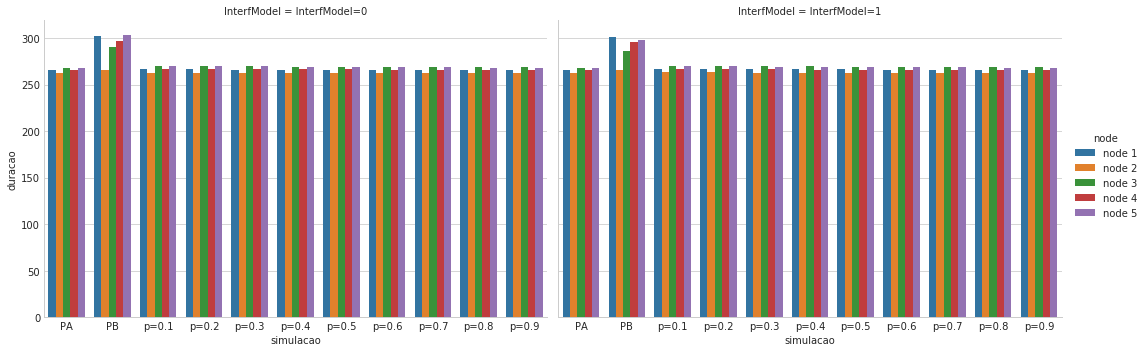

In [7]:
# exceto para o nó 0
select = (dfData['node'] != 'node 0') & (dfData['InterfModel'] != 'InterfModel=2')
# select = (dfData['InterfModel'] != 'InterfModel=2')
df = dfData[select]

g = sns.factorplot(x="simulacao", y="duracao", hue="node", col="InterfModel",
                   data=df,
                   kind='bar',
                   palette="tab10",
                   size=5,
                   aspect=1.5)
# g.set(ylim=(0,1.05))
# g.set()

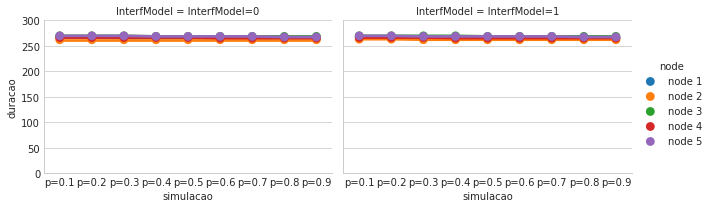

In [8]:
# exceto para o nó 0
select = (dfData['node'] != 'node 0') & (dfData['InterfModel'] != 'InterfModel=2') & (dfData['simulacao'] != 'PA') & (dfData['simulacao'] != 'PB')
df = dfData[select]
simulacoes = df['simulacao'].unique()
grid = sns.factorplot(x="simulacao", y="duracao", hue="node", col="InterfModel",
                   data=df,
                   kind='point',
                   palette="tab10",
                   size=3,
                   aspect=1.5,
                   linewidth=0.3
                  )
grid.set(ylim=(0,300))

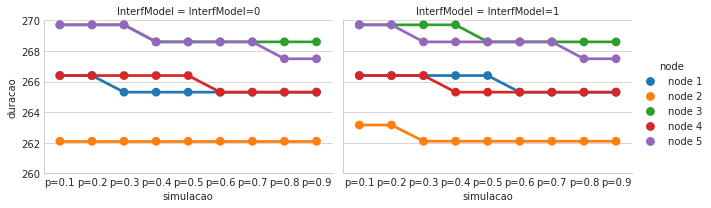

In [9]:
# exceto para o nó 0
select = (dfData['node'] != 'node 0') & (dfData['InterfModel'] != 'InterfModel=2') & (dfData['simulacao'] != 'PA') & (dfData['simulacao'] != 'PB')
df = dfData[select]
simulacoes = df['simulacao'].unique()
grid = sns.factorplot(x="simulacao", y="duracao", hue="node", col="InterfModel",
                   data=df,
                   kind='point',
                   palette="tab10",
                   size=3,
                   aspect=1.5,
                   linewidth=0.3
                  )
grid.set(ylim=(260,270))

#select = (dfData['simulacao'] == 'PA') | (dfData['simulacao'] == 'PB')
#df = dfData[select]

# grid.map(plt.axhline, y=300, ls="--", c="red")
#grid.map(plt.plot,x=simulacoes,y='duracao' )

In [10]:
dfPorcentagemGasto = DATA.applymap(porcentagem_de_uso_bateria)

In [11]:
dfPorcentagemGasto

,InterfModel,node 0,node 1,node 2,node 3,node 4,node 5,simulacao
0,InterfModel=0,0.004979,0.001309,0.001325,0.001298,0.001309,0.001298,PA
1,InterfModel=1,0.004984,0.001309,0.001325,0.001298,0.001309,0.001298,PA
2,InterfModel=2,0.004979,0.001309,0.001325,0.001298,0.001309,0.001298,PA
3,InterfModel=0,0.004979,0.001149,0.001309,0.001197,0.001170,0.001143,PB
4,InterfModel=1,0.004979,0.001154,0.001309,0.001213,0.001175,0.001165,PB
5,InterfModel=2,0.004979,0.001154,0.001309,0.001207,0.001175,0.001165,PB
6,InterfModel=0,0.004984,0.001303,0.001325,0.001287,0.001303,0.001287,p=0.1
7,InterfModel=1,0.004984,0.001303,0.001319,0.001287,0.001303,0.001287,p=0.1
8,InterfModel=2,0.004984,0.001303,0.001325,0.001287,0.001303,0.001287,p=0.1
9,InterfModel=0,0.004984,0.001303,0.001325,0.001287,0.001303,0.001287,p=0.2


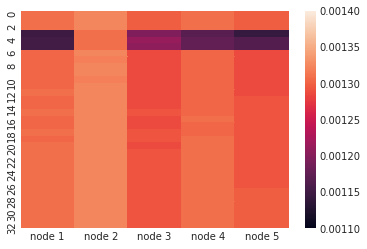

In [12]:
sns.heatmap(dfPorcentagemGasto[['node 1', 'node 2', 'node 3', 'node 4', 'node 5']],
            vmin=0.0011,
            vmax=0.0014
           )

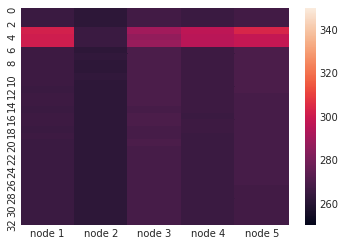

In [13]:
sns.heatmap(dfTempoDuracao[['node 1', 'node 2', 'node 3', 'node 4', 'node 5']],
            vmin=250,
            vmax=350
           )